In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importing and Reading Data

# Dataset Description:
The dataset contains information on 30,000 credit card clients in Taiwan. It includes demographic data (e.g., age, gender, education, marital status), credit details (e.g., credit limit, bill statements, payment history), and whether the client defaulted on the next month’s payment.

Rows: 30,000 records (clients)

Columns: 24 features including the target variable default.payment.next.month

Goal: Predict the probability of a client defaulting in the next month.

In [3]:
#Load the dataset:
df = pd.read_csv('default credit card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Basic checks
### Exploratory Data Analysis

In [5]:
# Dataset Shape:

print(f"Total number of rows: {df.shape[0]} ")
print(f"Total number of columns : {df.shape[1]} ")
df.head()

Total number of rows: 30000 
Total number of columns : 25 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#to find -ve values
negative_ages = df[df['AGE'] < 0]
negative_ages

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month



###  Basic Structure Info


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

###  Statistical Summary

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Data Types of Columns

In [12]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

### handling missing values

In [14]:

missing = df.isnull().sum()
print("Missing values:\n", missing)

# Option: fill numeric NaNs with column median
df.fillna(df.median(numeric_only=True), inplace=True)

Missing values:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


### unique Values in Each Column

In [16]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [17]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
#renaming the columns
df = df.rename(columns={'default payment next month': 'default_payment_next_month'})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# To check duplicates

In [20]:

duplicates=df.duplicated().sum()
print(df.duplicated().unique())
print(f"Duplicate Rows : {duplicates}")


[False]
Duplicate Rows : 0


In [21]:
df.drop_duplicates()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [22]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# droping column ID


In [24]:
df.drop('ID', axis=1, inplace=True)

In [25]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [26]:
df_cleaned=df
df_cleaned

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Filtering the numerical columns


In [28]:

# Define target column
target_col = 'default_payment_next_month'

# Separate features and target
features = df.drop(columns=[target_col])
target = df[target_col]

# Identify numeric columns
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

# No.of rows for subplot
plots_per_row = 3
num_rows = (len(numerical_cols) + plots_per_row - 1) // plots_per_row



In [29]:
target_col

'default_payment_next_month'

In [30]:
numerical_cols

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

# Visualizating using boxplot to find outliers in numerical columns
 Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median


## Skewness Detection and Correction
Before plotting boxplots and splitting the data, we first check the skewness of numerical features, visualize them, and apply transformations to reduce skewness.

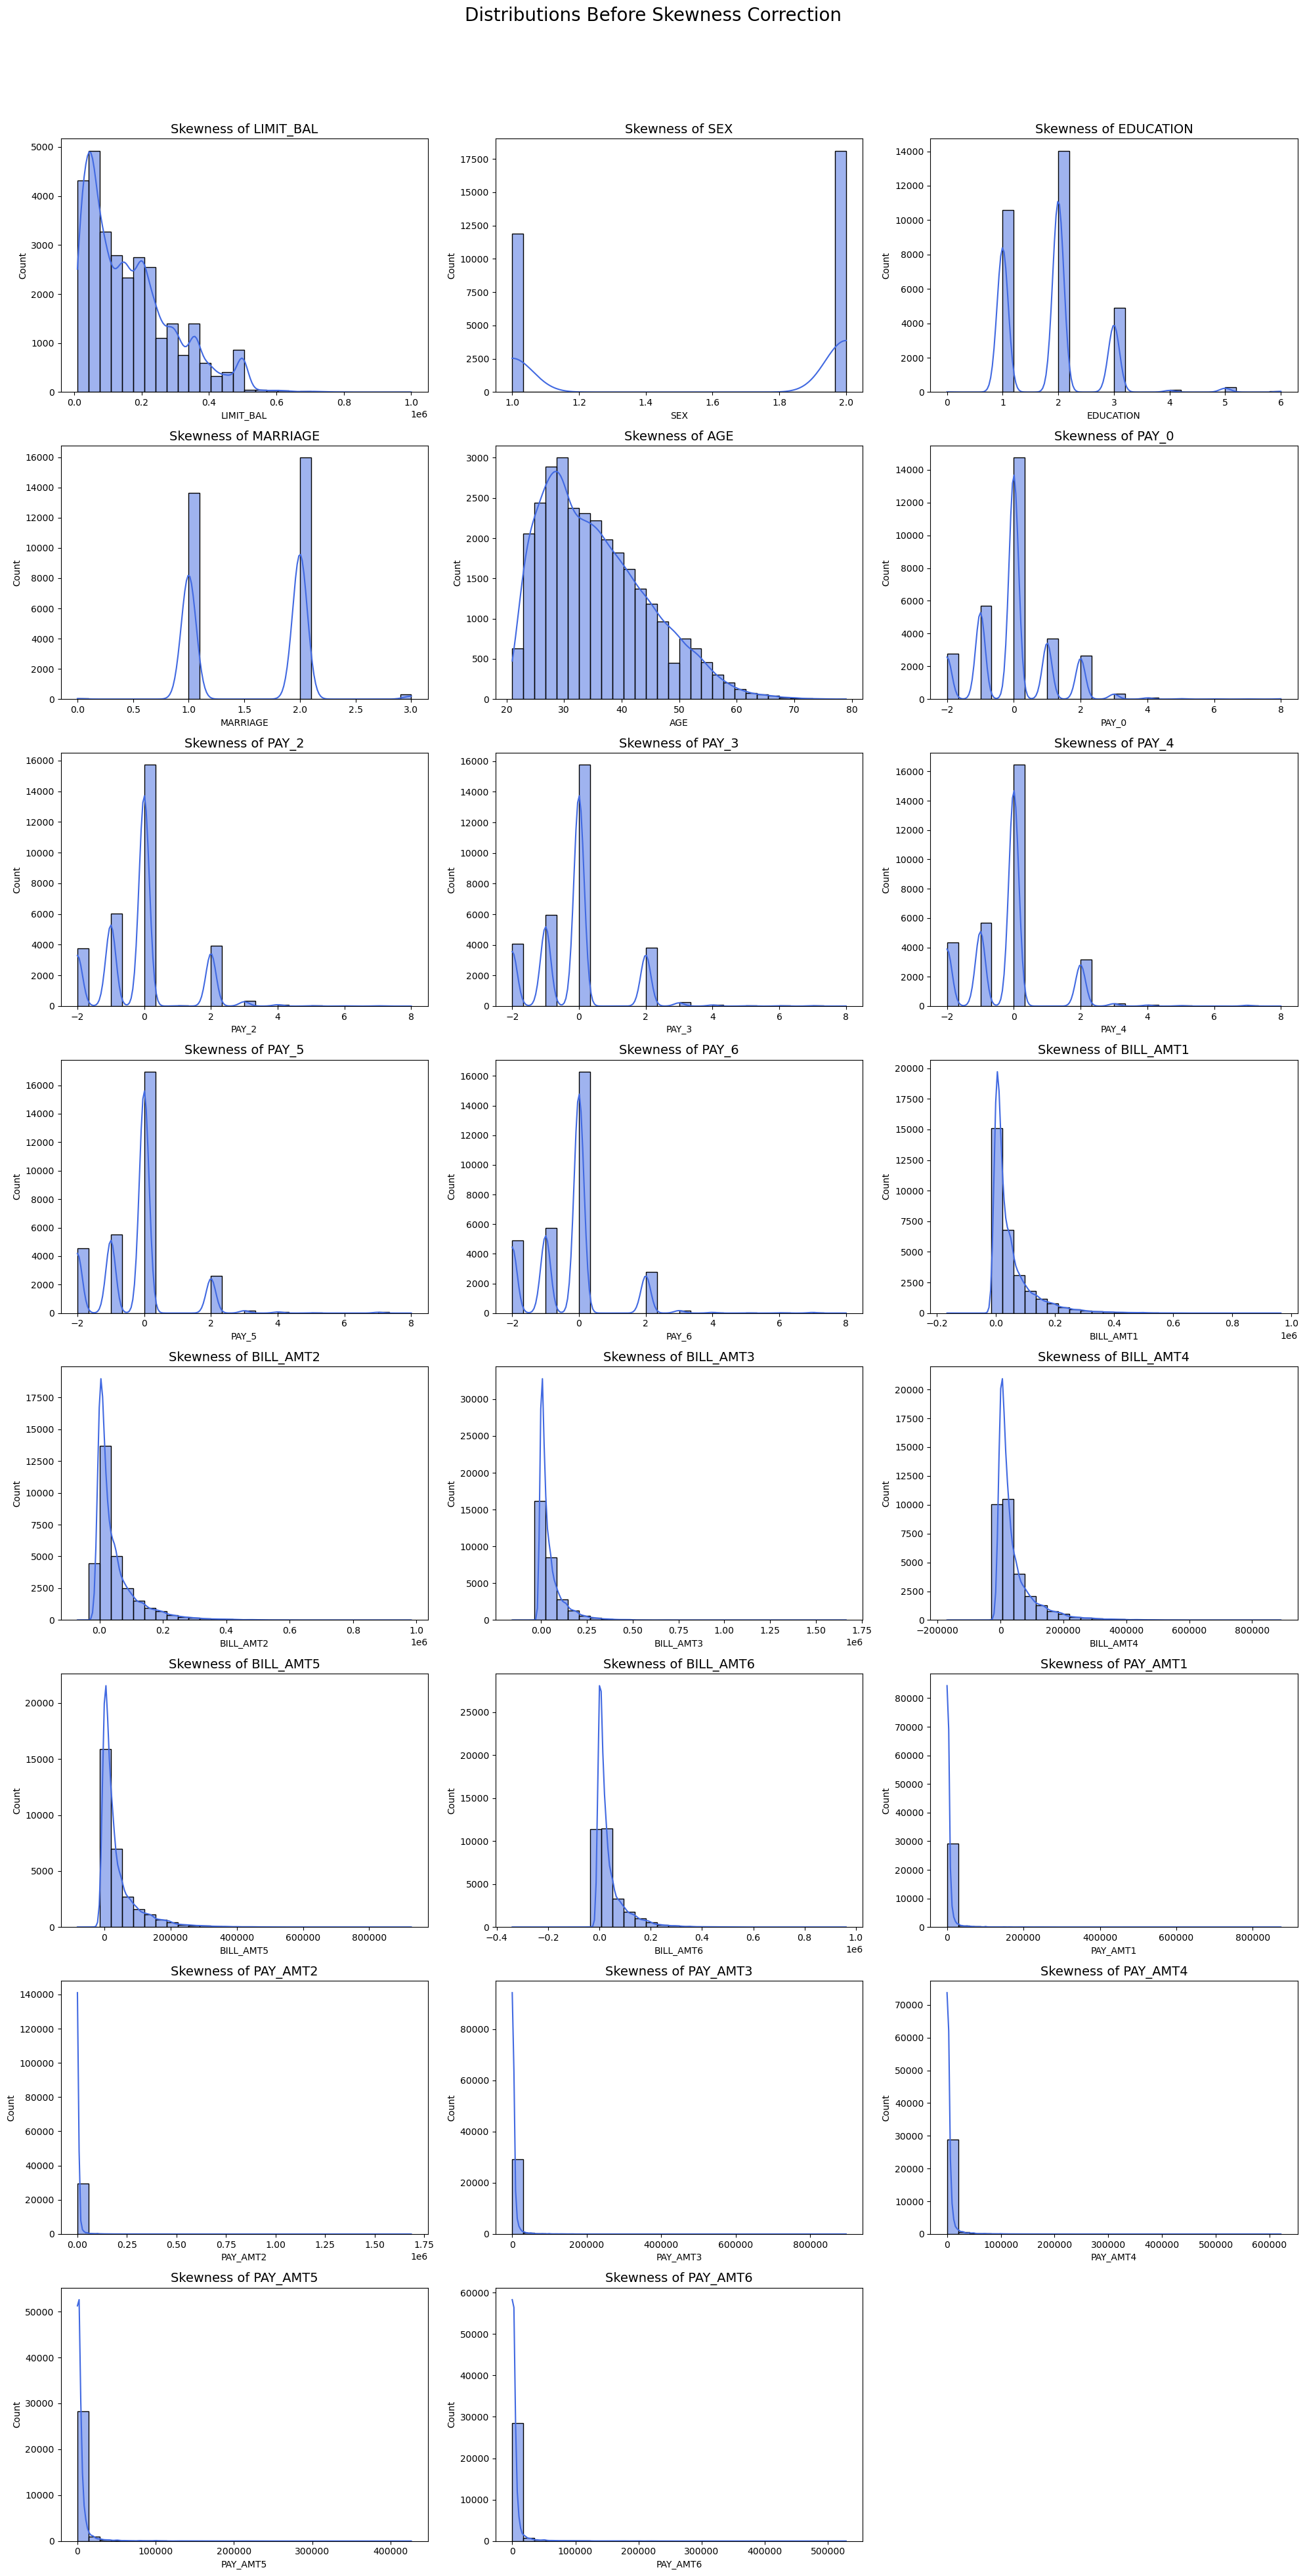

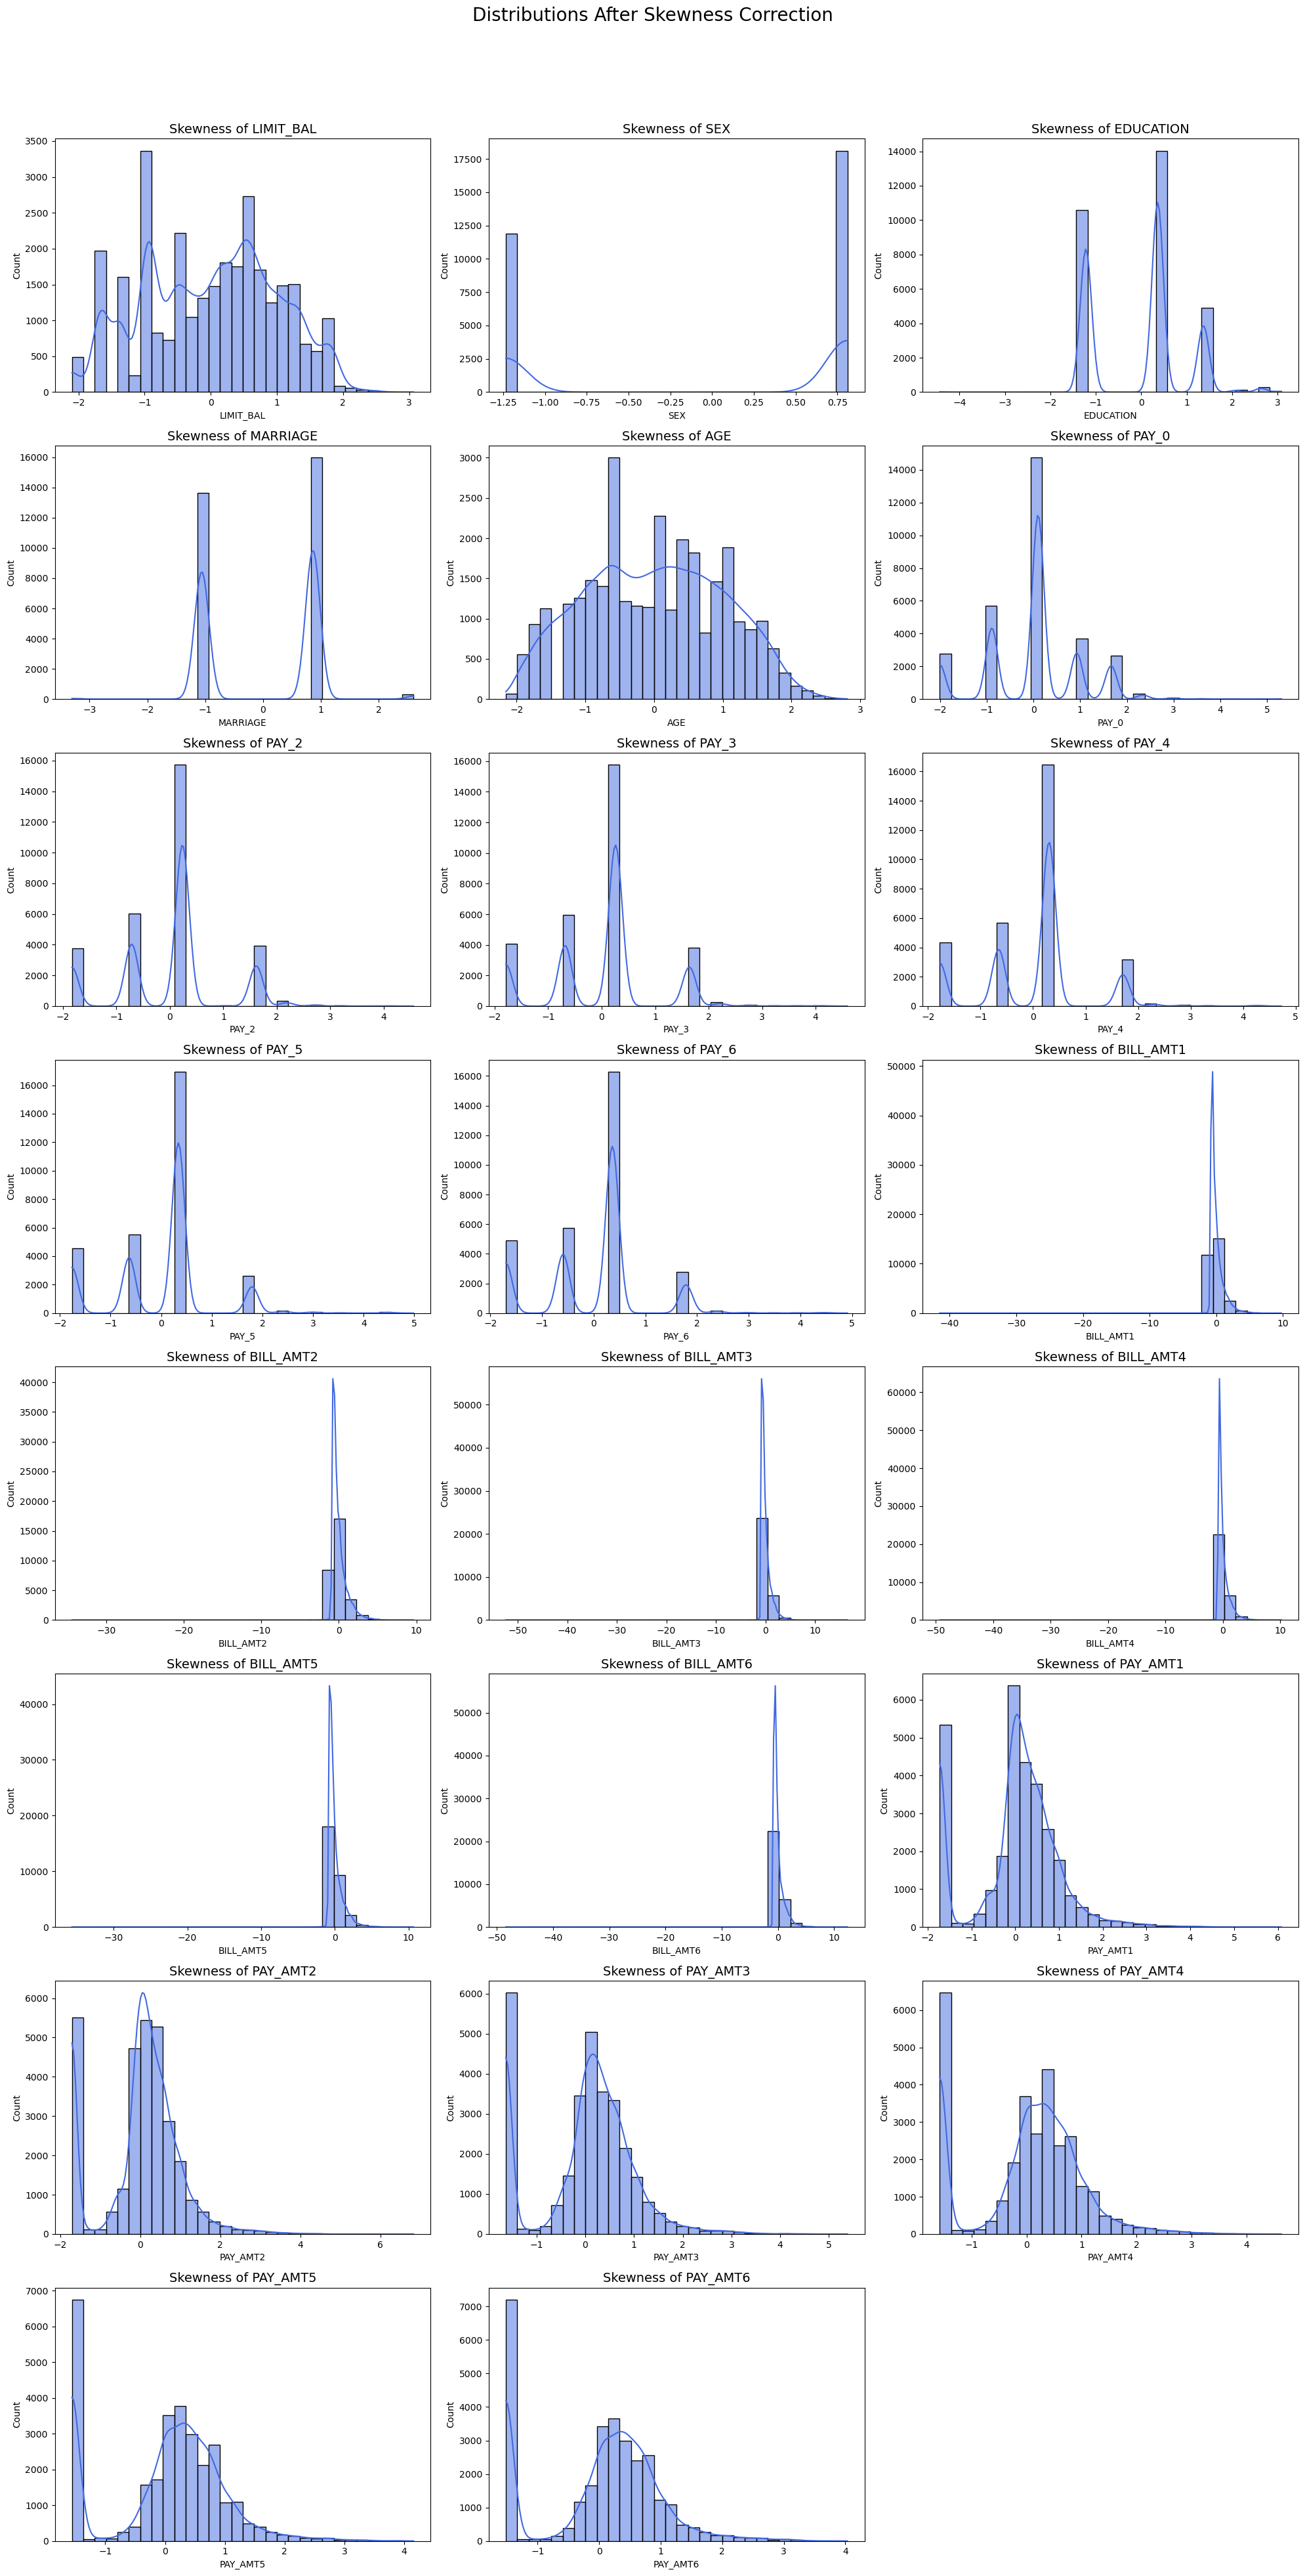

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Better grid plotting function
def plot_distributions(data, numerical_cols, title):
    n_cols = 3
    n_rows = int(np.ceil(len(numerical_cols) / n_cols))
    # Height scaled by number of rows (5 inches per row)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    fig.suptitle(title, fontsize=20)
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(
            data[col], bins=30, kde=True, 
            ax=axes[i], color="royalblue", edgecolor="black"
        )
        axes[i].set_title(f'Skewness of {col}', fontsize=14)
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel(col)

    # Hide unused axes
    for j in range(len(numerical_cols), len(axes)):
        axes[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Original distributions
plot_distributions(features, numerical_cols, 'Distributions Before Skewness Correction')

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
features[numerical_cols] = pt.fit_transform(features[numerical_cols])

# Transformed distributions
plot_distributions(features, numerical_cols, 'Distributions After Skewness Correction')

# Recombine
df_transformed = features.copy()
df_transformed[target_col] = target


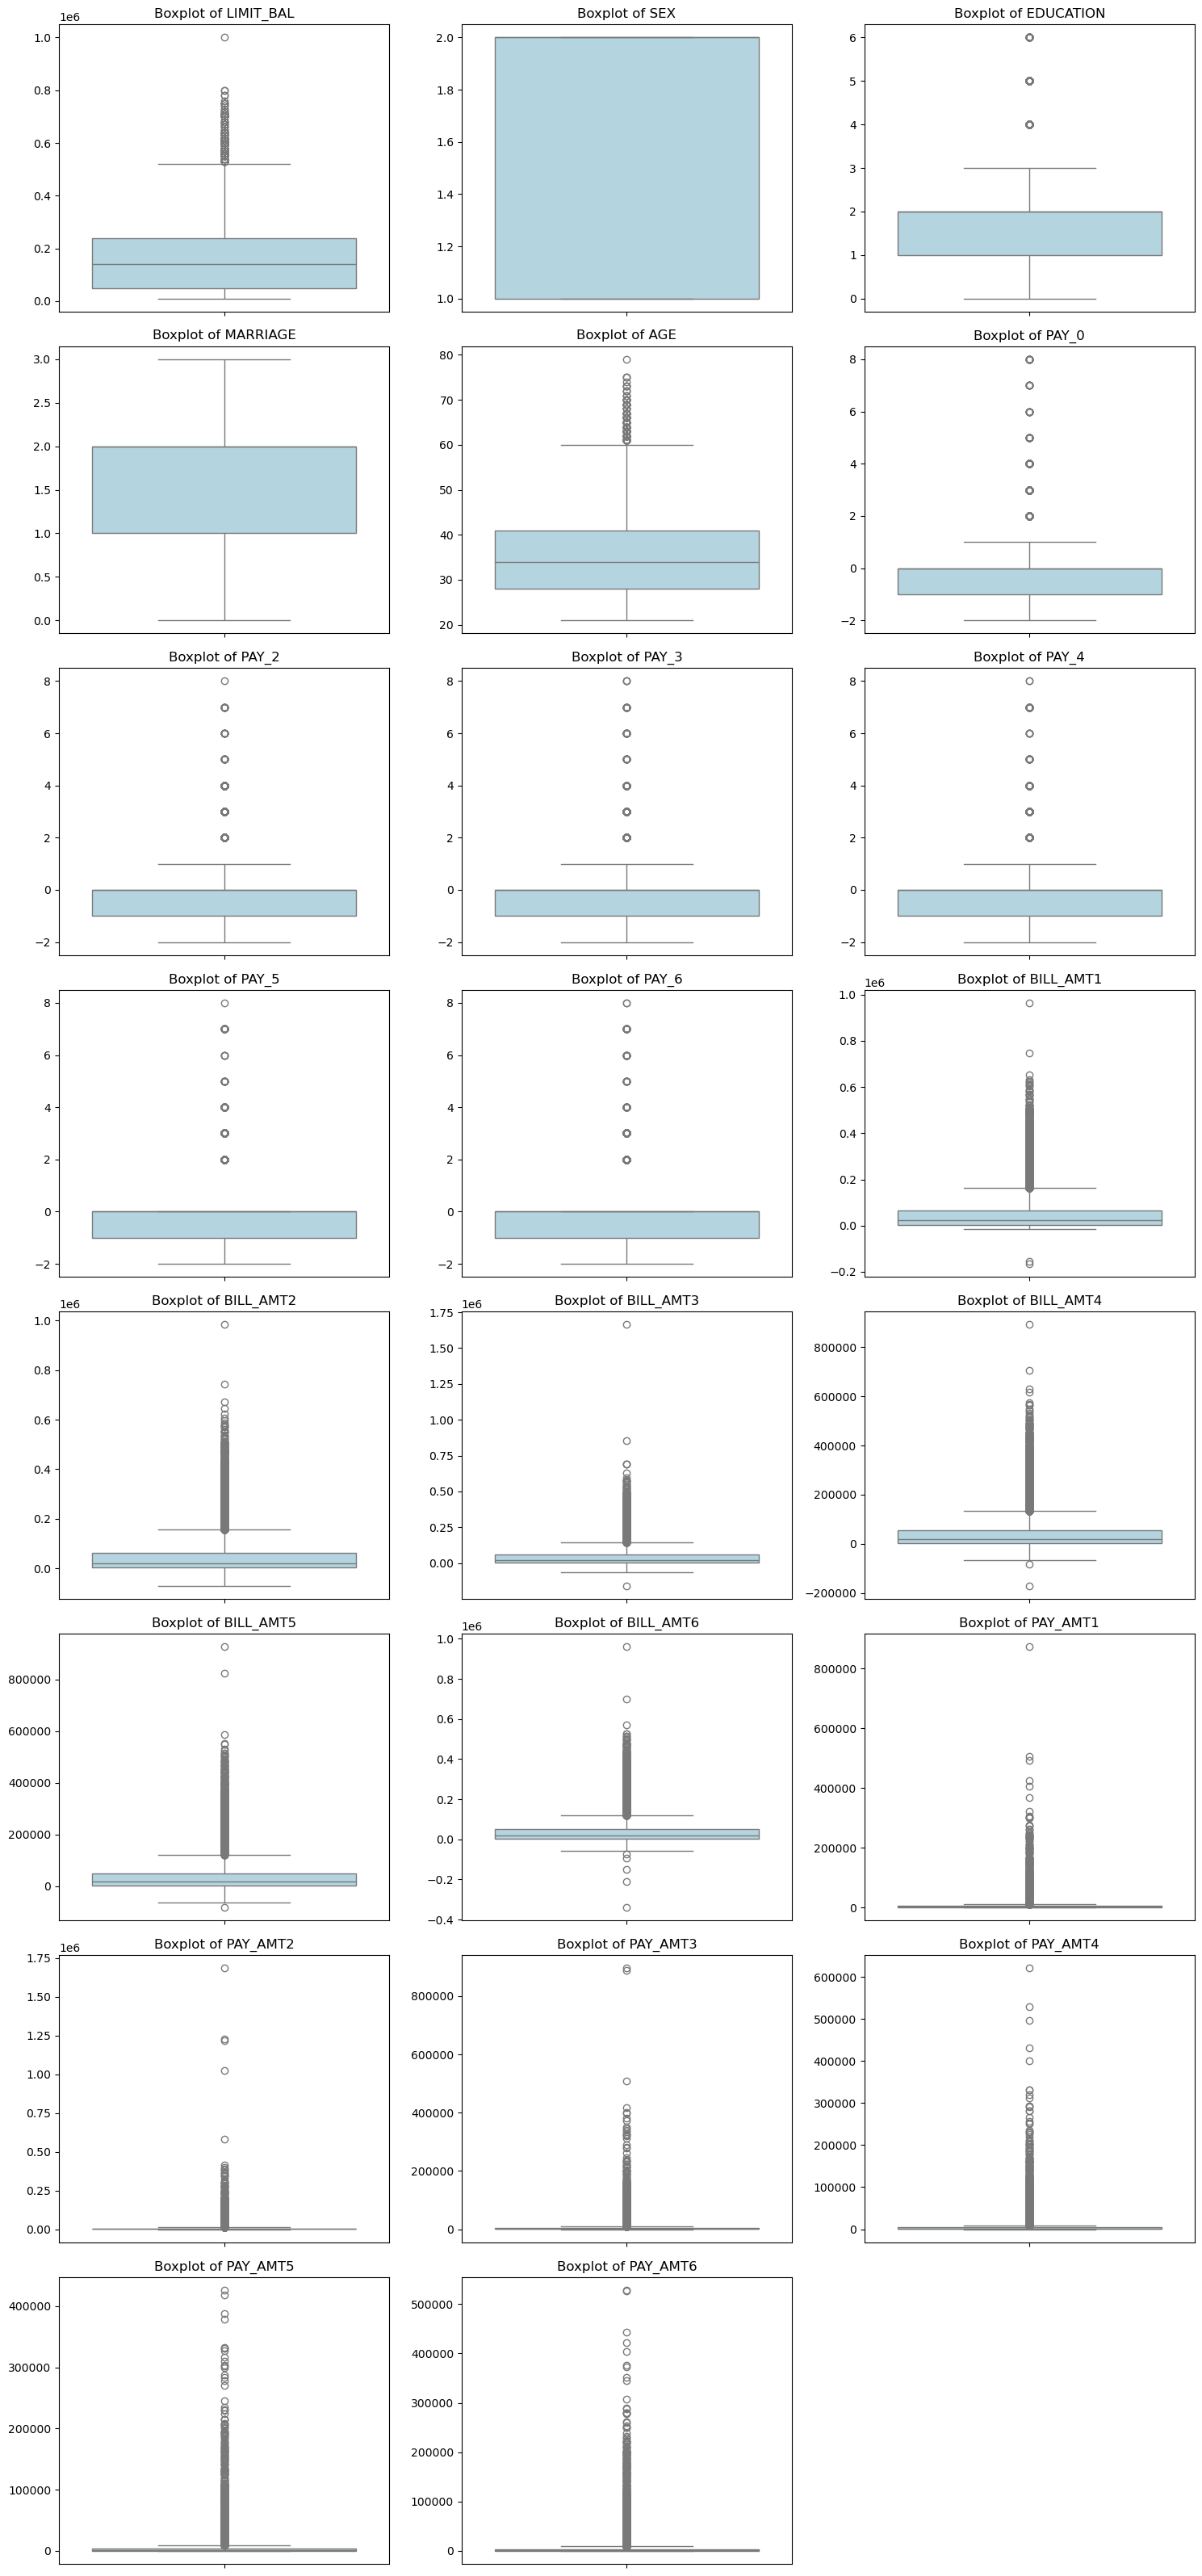

In [34]:
# --- Boxplots for Outlier Detection ---

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
 
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(data=df_cleaned, y=col, color="lightblue")
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [35]:


numerical_cols_clipping = [col for col in numerical_cols if col != 'default_payment_next_month']

for col in numerical_cols_clipping:
    q1 = df_cleaned[col].quantile(0.25)
    q3 = df_cleaned[col].quantile(0.75)
    IQR = q3 - q1
    lowerl = q1 - 1.5 * IQR
    upperl = q3 + 1.5 * IQR
# clipping
    df_cleaned[col] = df_cleaned[col].clip(lower=lowerl, upper=upperl)


In [36]:
 df_cleaned[col]

0           0.0
1        2000.0
2        5000.0
3        1000.0
4         679.0
          ...  
29995    1000.0
29996       0.0
29997    3100.0
29998    1804.0
29999    1000.0
Name: PAY_AMT6, Length: 30000, dtype: float64

# Without outliers

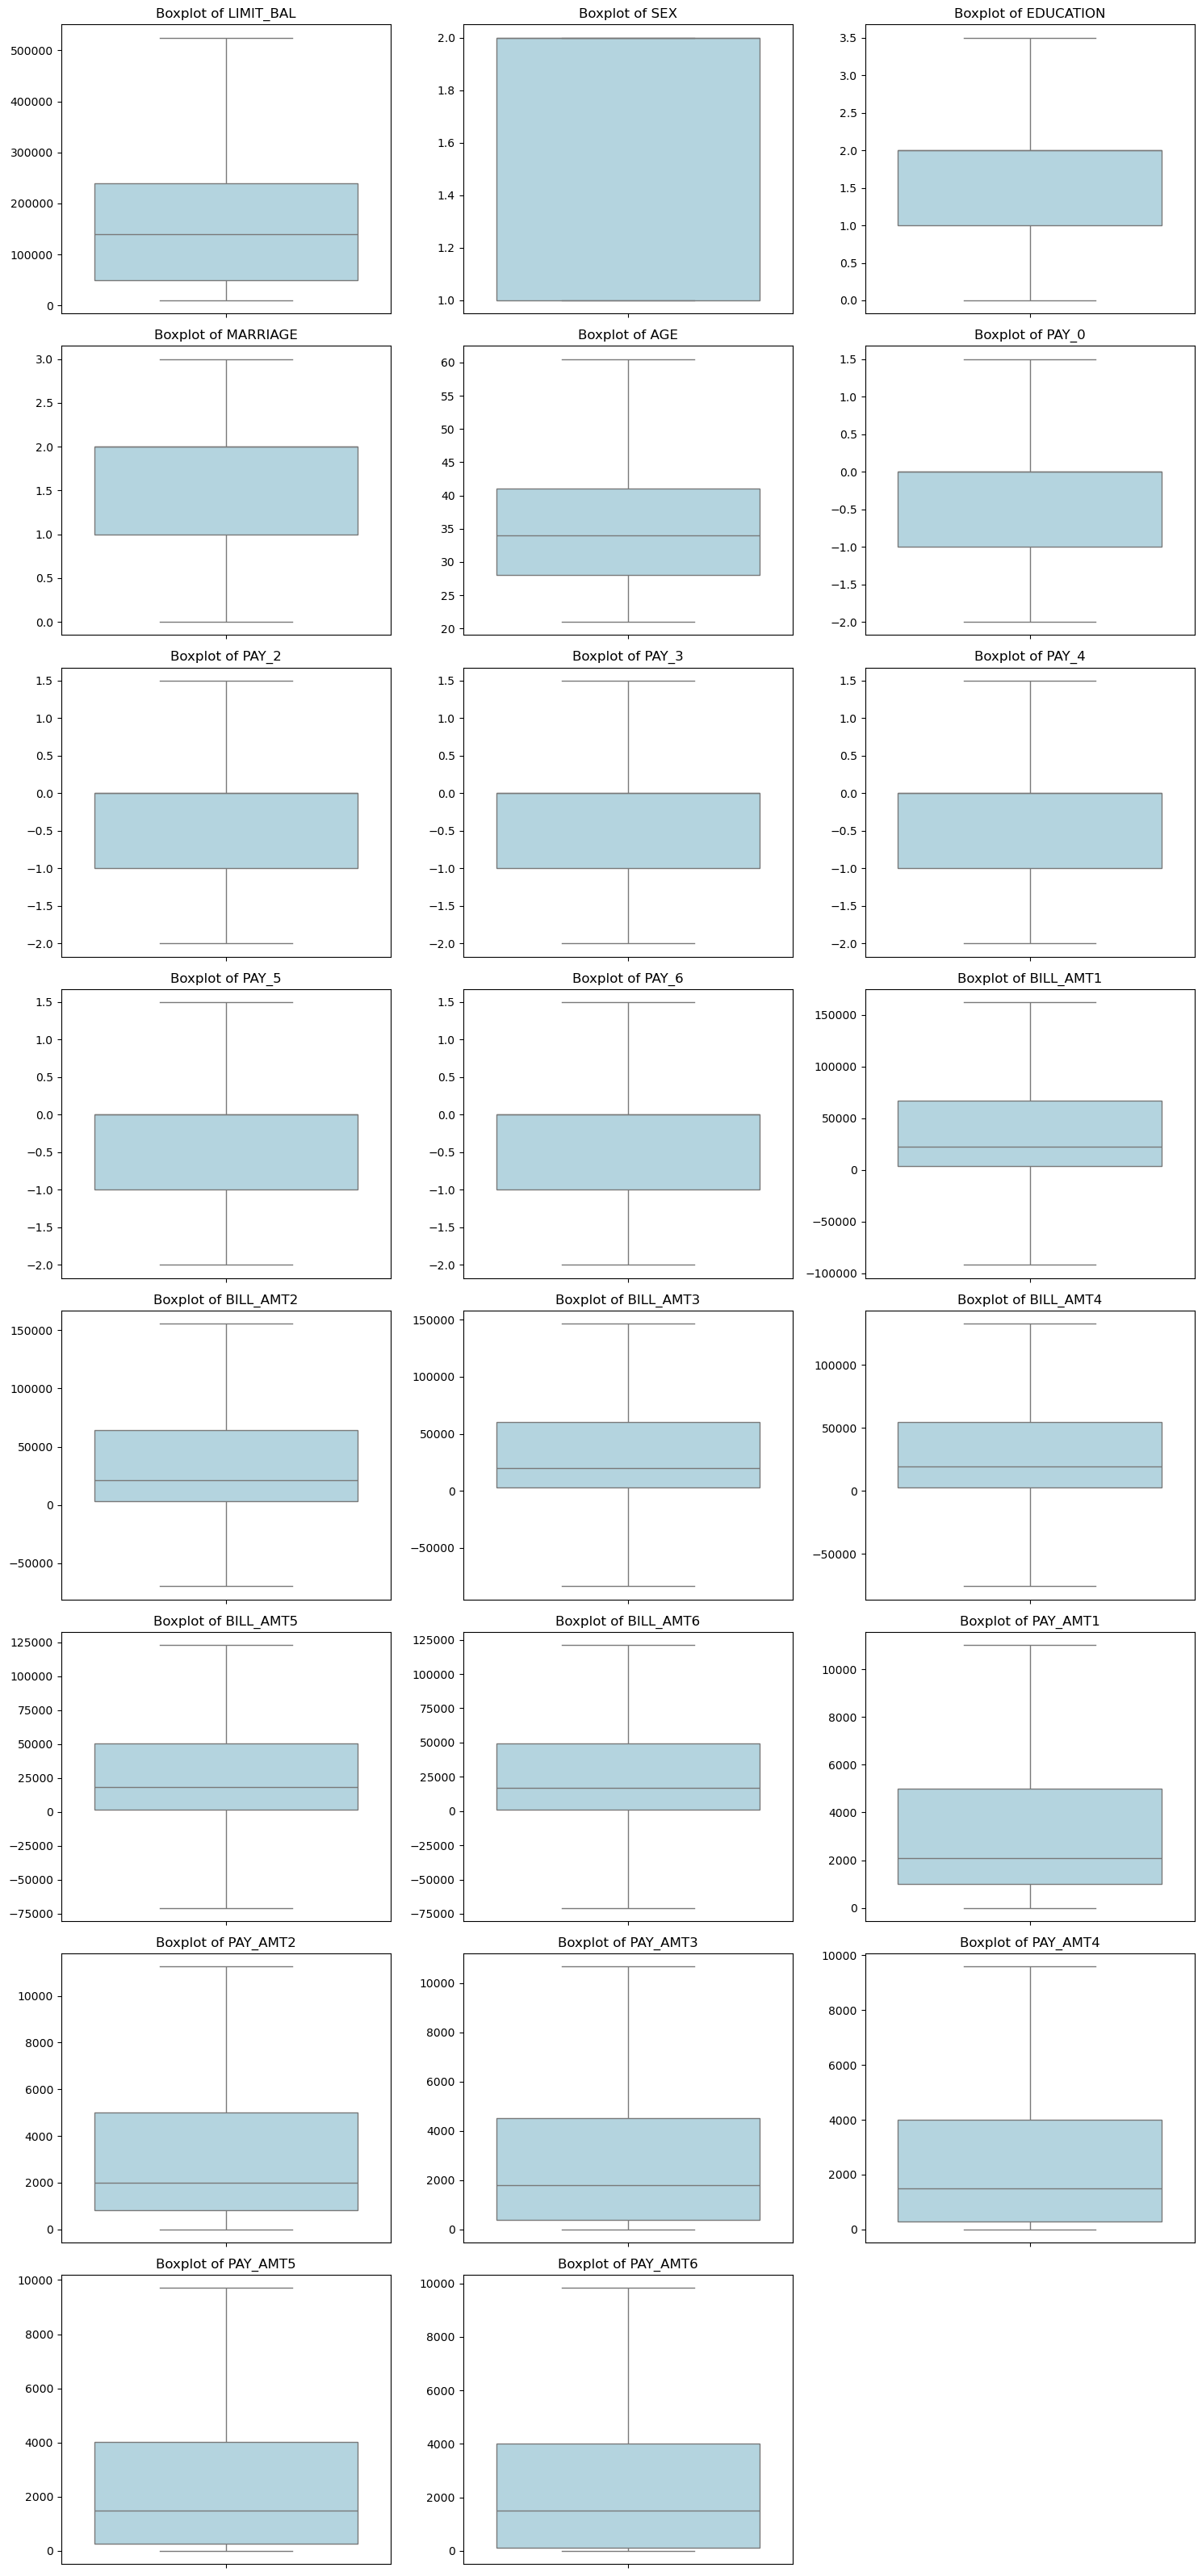

In [38]:
# Number of columns per row
plots_per_row = 3
num_cols = len(numerical_cols)

# Dynamically compute number of rows
num_rows = (num_cols // plots_per_row) + (num_cols % plots_per_row > 0)

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(data=df_cleaned, y=col, color="lightblue")
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
plt.tight_layout()
plt.show()


# MODEL EVALUATION 
 DATA SPLITTING 

In [40]:

x = df_cleaned.drop('default_payment_next_month', axis=1)
y = df_cleaned['default_payment_next_month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64

In [41]:
print(y.value_counts())

default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64


In [42]:
x.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2.0,1,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0,689.0,0.0,0.0,0,0.0
1,120000,2,2.0,2,26.0,-1.0,1.5,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0,1000.0,1000.0,1000.0,0,2000.0
2,90000,2,2.0,2,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518,1500.0,1000.0,1000.0,1000,5000.0
3,50000,2,2.0,1,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000,2019.0,1200.0,1100.0,1069,1000.0
4,50000,1,2.0,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000,11250.5,10000.0,9000.0,689,679.0


In [43]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

## TRAIN TEST SPLIT

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=42,stratify=y)

print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1], dtype=int64), array([18691,  5309], dtype=int64))
(array([0, 1], dtype=int64), array([4673, 1327], dtype=int64))


In [46]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

In [47]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2.0,1,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0,689.0,0.0,0.0,0,0.0
1,120000,2,2.0,2,26.0,-1.0,1.5,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0,1000.0,1000.0,1000.0,0,2000.0
2,90000,2,2.0,2,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518,1500.0,1000.0,1000.0,1000,5000.0
3,50000,2,2.0,1,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000,2019.0,1200.0,1100.0,1069,1000.0
4,50000,1,2.0,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000,11250.5,10000.0,9000.0,689,679.0


In [48]:
len(x_train),len(y_train),len(x_test),len(y_test)



(24000, 24000, 6000, 6000)

In [49]:
from sklearn.preprocessing import StandardScaler

## SCALING 


In [51]:
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [52]:
x_train_scaled

array([[-0.05347418,  0.80844039,  0.23110626, ...,  1.09635726,
         2.25325488,  1.08704066],
       [-0.13177586,  0.80844039, -1.15035082, ..., -0.88516832,
        -0.88439795, -0.86557494],
       [-1.22799946, -1.23694958,  0.23110626, ..., -0.78966528,
        -0.7857398 , -0.54547402],
       ...,
       [-0.36668092,  0.80844039, -1.15035082, ..., -0.2354878 ,
        -0.49623472, -0.54547402],
       [ 1.51255953, -1.23694958, -1.15035082, ..., -0.88516832,
        -0.88439795, -0.86557494],
       [ 1.04274941, -1.23694958, -1.15035082, ..., -0.88516832,
        -0.88439795, -0.86557494]])

In [53]:
x_test_scaled

array([[-0.91479272, -1.23694958,  0.23110626, ..., -0.13153892,
        -0.31379799,  0.04383177],
       [-0.13177586, -1.23694958, -1.15035082, ..., -0.88516832,
         2.25325488,  2.27889641],
       [-0.91479272, -1.23694958,  0.23110626, ..., -0.2354878 ,
        -0.3021531 , -0.21320927],
       ...,
       [ 0.41633593, -1.23694958, -1.15035082, ...,  2.22976552,
        -0.88439795, -0.86557494],
       [-0.36668092, -1.23694958, -1.15035082, ...,  2.22976552,
        -0.88439795, -0.86557494],
       [ 0.25973256, -1.23694958,  1.61256334, ...,  0.8699436 ,
        -0.88439795, -0.86557494]])

In [54]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
print(x_train_scaled_df.head())

   LIMIT_BAL      SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -0.053474  0.80844   0.231106  0.856739 -0.263865  1.671868  1.746633   
1  -0.131776  0.80844  -1.150351  0.856739 -0.153799  1.146426 -0.773185   
2  -1.227999 -1.23695   0.231106 -1.059367  1.607259  1.146426  1.746633   
3   0.416336  0.80844  -1.150351  0.856739 -0.704130  0.095543  0.234742   
4   1.121051  0.80844  -1.150351  0.856739 -0.373931  1.146426 -1.781112   

      PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  1.768844  1.859377  0.359850  ...   2.275077   2.252593   2.237272   
1 -0.744135 -1.750396 -1.749417  ...  -0.858653  -0.854778  -0.845195   
2  0.261057  0.312331  0.359850  ...  -0.677880  -0.665984  -0.638738   
3  0.261057  0.312331  0.359850  ...   2.275077   2.252593   2.237272   
4 -0.744135  0.312331  0.359850  ...  -0.851676  -0.847149  -0.851092   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0   2.255165  2.150886 -0.970

# MODEL DEVELOPMENT

In [56]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

logistic_model=LogisticRegression()
logistic_model.fit(x_train_scaled,y_train)
lr_result = logistic_model.predict(x_test_scaled)

RandomForest_model=RandomForestClassifier()
RandomForest_model.fit(x_train_scaled,y_train)
rf_result=  RandomForest_model.predict(x_test_scaled)

DecisionTree_model=DecisionTreeClassifier()
DecisionTree_model.fit(x_train_scaled,y_train)
dt_result =DecisionTree_model.predict(x_test_scaled)

SVC_model=SVC()
SVC_model.fit(x_train_scaled,y_train)
svm_result = SVC_model.predict(x_test_scaled)

Knn_model=KNeighborsClassifier()
Knn_model.fit(x_train_scaled,y_train)
knn_result =Knn_model.predict(x_test_scaled)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



In [58]:
def comparison_model(y_test,result,model_name):
    CR=classification_report(y_test,result)
    CM=confusion_matrix(y_test,result)
    f1 = f1_score(y_test, result)
    accuracy= accuracy_score(y_test, result)

    print(f"{model_name} performance:")
    print('Classification Report:\n', CR)
    print("\n")
    print('Confusion matrix',CM)
    print("\n")
    print('f1-score', f1)
    print('accuracy_score:', accuracy)
    print("\n")
    return {
        'Model': model_name,
        'Classification Report': CR,
        'Confusion Matrix': CM,
        'f1-score':f1,
        'accuracy_score': accuracy
    }
results=[]

In [59]:
results.append(comparison_model(y_test,lr_result,'logistic regression'))


results.append(comparison_model(y_test,dt_result,'Decision Tree'))


results.append(comparison_model(y_test,rf_result,' Random Forest'))

results.append(comparison_model(y_test,svm_result,' Support Vector Machine'))

results.append(comparison_model(y_test,knn_result,' kNN'))

logistic regression performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.88      4673
           1       0.66      0.23      0.34      1327

    accuracy                           0.80      6000
   macro avg       0.74      0.60      0.61      6000
weighted avg       0.78      0.80      0.76      6000



Confusion matrix [[4510  163]
 [1017  310]]


f1-score 0.34444444444444444
accuracy_score: 0.8033333333333333


Decision Tree performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.37      0.41      0.39      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.72      6000



Confusion matrix [[3768  905]
 [ 788  539]]


f1-score 0.3890292313244316
accuracy_score: 0.7178333333333333


 Random For

In [60]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='f1-score', ascending=False).reset_index(drop=True)
print(results_df[['Model', 'accuracy_score', 'f1-score']])

                     Model  accuracy_score  f1-score
0   Support Vector Machine        0.815333  0.462658
1            Random Forest        0.812000  0.458733
2                      kNN        0.788667  0.403575
3            Decision Tree        0.717833  0.389029
4      logistic regression        0.803333  0.344444


In [61]:
# Get the best and worst models by F1-score
best_row = results_df.loc[results_df['accuracy_score'].idxmax()]
worst_row = results_df.loc[results_df['accuracy_score'].idxmin()]

# Format and print
print(f"Best Model: {best_row['Model']} with accuracy_score = {best_row['accuracy_score']:.2f}")
print(f"Worst Model: {worst_row['Model']} with accuracy_score = {worst_row['accuracy_score']:.2f}")

Best Model:  Support Vector Machine with accuracy_score = 0.82
Worst Model: Decision Tree with accuracy_score = 0.72


## SVM - Confusion Matrix visualization

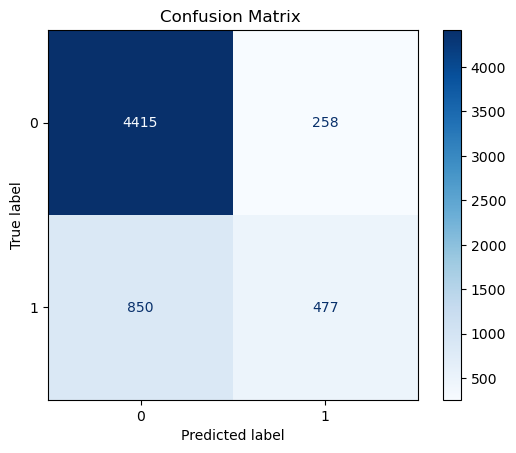

In [63]:
cm = confusion_matrix(y_test, svm_result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix ")
plt.show()

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

svc = SVC()

# Very small search space
param_dist = {
    "C": [0.1, 1, 10],
    "gamma": [0.01, 0.1, 1],
    "kernel": ["rbf"]
}

random_search = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=5,         # only 5 combinations
    scoring="accuracy",
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train_scaled, y_train)

best_svc = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)



Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
Best CV Accuracy: 0.8092916666666667


# Here’s the takeaway from your results:

Default SVC:
Accuracy on test set: ≈ 0.82

RandomizedSearchCV tuned SVC:
Best parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
Cross-validation accuracy: ≈ 0.809

Conclusion:-
The tuned model did not outperform the default SVC. In fact, accuracy dropped slightly (0.82 → 0.809).

This can happen if:
The default parameters were already close to optimal for your dataset.The search space was limited (C and gamma choices were narrow).RandomizedSearchCV optimized for CV performance, but test distribution may differ slightly.


##  Model Evaluation & Visualization
We compare the **default model** and the **tuned model** using visualizations:  
- Confusion Matrix (heatmap)  
- ROC Curve  
- Precision-Recall Curve  


In [78]:
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
# --- Default SVC ---
default_svc = SVC(kernel="rbf", probability=True)
default_svc.fit(x_train_scaled, y_train)
y_pred_default = default_svc.predict(x_test_scaled)
y_score_default = default_svc.predict_proba(x_test_scaled)[:, 1]

# --- Tuned SVC ---
best_svc = random_search.best_estimator_
best_svc.probability = True  # ensure probability scores
best_svc.fit(x_train_scaled, y_train)
y_pred_tuned = best_svc.predict(x_test_scaled)
y_score_tuned = best_svc.predict_proba(x_test_scaled)[:, 1]

# --- Print Metrics ---
print("Default SVC Accuracy:", accuracy_score(y_test, y_pred_default))
print("Tuned SVC Accuracy:", accuracy_score(y_test, y_pred_tuned))

print("\nClassification Report (Default):\n", classification_report(y_test, y_pred_default))
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_tuned))



Default SVC Accuracy: 0.8153333333333334
Tuned SVC Accuracy: 0.8053333333333333

Classification Report (Default):
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.79      6000


Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      4673
           1       0.63      0.30      0.40      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.81      0.78      6000



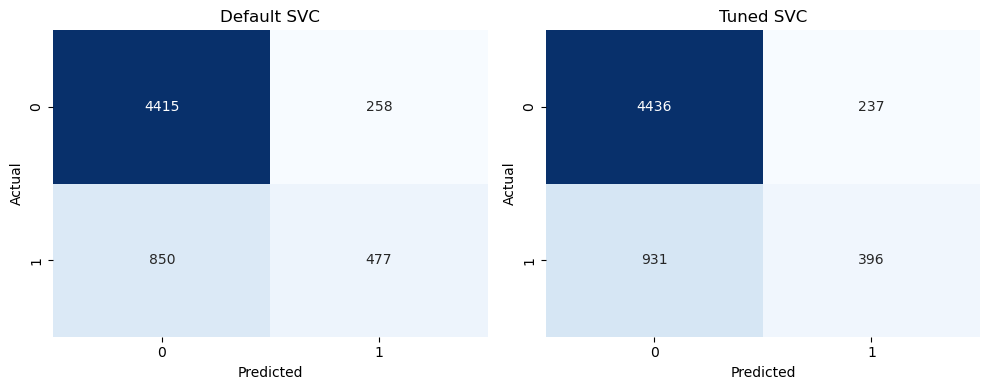

In [80]:

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, y_pred, title in zip(
    axes,
    [y_pred_default, y_pred_tuned],
    ["Default SVC", "Tuned SVC"]
):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False)
    ax.set_title(f"{title}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

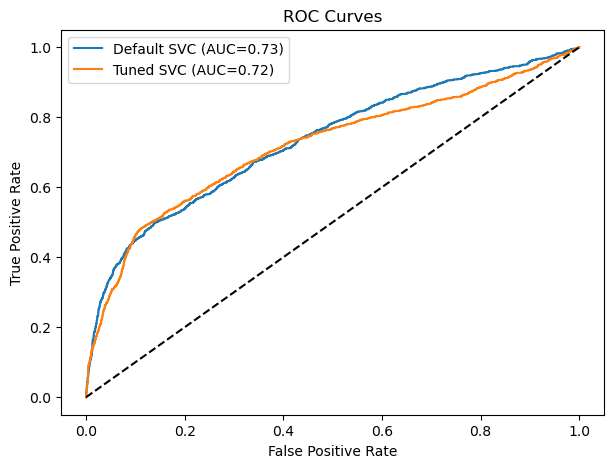

In [82]:
# --- ROC Curves ---
plt.figure(figsize=(7, 5))
for label, y_score in [
    ("Default SVC", y_score_default),
    ("Tuned SVC", y_score_tuned)
]:
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{label} (AUC={auc(fpr, tpr):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

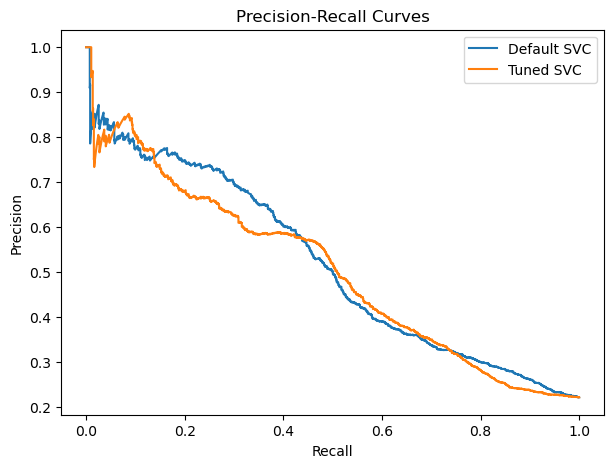

In [86]:
plt.figure(figsize=(7, 5))
for label, y_score in [
    ("Default SVC", y_score_default),
    ("Tuned SVC", y_score_tuned)
]:
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.plot(recall, precision, label=label)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.show()

# Accuracy:
Default SVC achieved ~81.5% accuracy, while the tuned SVC achieved ~80.5%.
The tuned model slightly underperformed compared to the default in terms of accuracy.

# Confusion Matrix:
Default SVC classified slightly more positives correctly (477 vs. 396) and fewer false negatives compared to the tuned version.
The tuned model had more false negatives, which reduced recall for the positive class.

# Classification Report:
For class 0, both models performed well with high precision and recall.
For class 1, performance dropped:

*    Default SVC had precision: 0.65, recall: 0.36
*   Tuned SVC had precision: 0.63, recall: 0.30
    
The default model captured more positives than the tuned version.

# ROC and PR Curves:
The Default SVC showed a slightly higher AUC (0.73 vs. 0.72).
Precision-Recall curve also indicated the default model handled imbalanced data slightly better.

# Overall Conclusion:
The tuning with the chosen small parameter space and class weights did not improve performance. The default SVC gave better recall for the minority class and slightly better overall accuracy and AUC. For future work, consider:

Expanding the hyperparameter search space.
Using class weights more systematically or techniques like SMOTE for imbalance.
Trying different kernels or ensemble methods.